# EDO: Problema de valor de contorno
## Método do tiro

Assuma a seguinte EDO de segunda ordem que representa a distribuição de calor ao longo de uma barra

\begin{align}
\frac{d^2T}{dx^2} &= k_0 \left(T(x) - T_s\right) + k_1 \left(T^4(x) - T_s^4\right) \\
T(0)   &= 493 \text{K}, ~T(0.1) = 293 \text{K}\\
\end{align}
onde $k = [167, ~9.45\times 10^{-08}]$ são parâmetros do sistema, $T_s=293$K é a temperatura ambiente, $T(x)$ é a Temperatura em função do comprimento, $x$, da barra; $T(0)$ e $T(0.1)$ são as condições de contorno.

### Redução de ordem

Para resolvermos a EDO-PVC, primeiramente vamos transformá-la em um problema PVI, dessa forma é preciso fazermos a redução de ordem

\begin{align}
\frac{dT(x)}{dx} &= w\\
\frac{dw(x)}{dx} &= k_0 \left(T(x) - T_s\right) + k_1 \left(T^4(x) - T_s^4\right)
\end{align}

Feito isso, para resolver o sistema de primeira ordem encontrado se faz nescessário as condições iniciais, $T(0)$ e $w(0)$. Porém só conhecemos a condição inicial $T(0) = 493$K, e por isso precisaremos chutar uma condição para $w(0)=?$

A partir daí resolvemos o sistema de EDO por um método PVI

In [ ]:
#@title Visualização
%%html
<p align="center">
<iframe src="https://www.geogebra.org/classic/tnewvaxp?embed"
        width="1200" height="700"
        allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>
</p>



Observe que pelo gráfico, o ultimo valor encontrado pela solução PVI, $T_{pvi}(0.1) = 443.5$, é diferente da condição de contorno dada, $T(0.1) = 293$,

Sendo assim temos que mudar o valor de $w(0)$, até fazermos $T_{pvi}(0.1) = T(0.1)$

Sendo assim, programe o método do tiro para resolução da EDO apresentada. Compare a solução da EDO para o $w(0)$ chutado com a solução encontrada pelo método do tiro



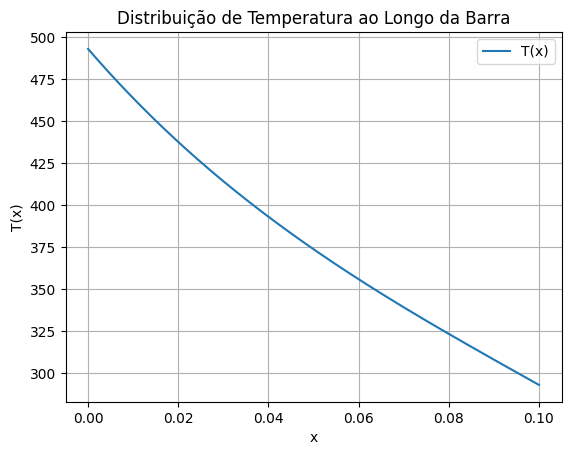

Condição inicial ajustada w(0): -3110.8238486950468


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

k0 = 167
k1 = 9.45e-8
Ts = 293
T0 = 493
T1 = 293

def edo(x, y):
    T, w = y
    dTdx = w
    dwdx = k0 * (T - Ts) + k1 * (T**4 - Ts**4)
    return [dTdx, dwdx]

def metodo_tiro(w0_inicial):
    sol = solve_ivp(edo, [0, 0.1], [T0, w0_inicial], t_eval=np.linspace(0, 0.1, 10000))
    return sol.y[0, -1] - T1

from scipy.optimize import root_scalar

solucao = root_scalar(metodo_tiro, bracket=[-10000, 10000])
w0_ajustado = solucao.root

sol_final = solve_ivp(edo, [0, 0.1], [T0, w0_ajustado], t_eval=np.linspace(0, 0.1, 10000))

plt.plot(sol_final.t, sol_final.y[0], label='T(x)')
plt.xlabel('x')
plt.ylabel('T(x)')
plt.title('Distribuição de Temperatura ao Longo da Barra')
plt.legend()
plt.grid()
plt.show()

print(f"Condição inicial ajustada w(0): {w0_ajustado}")